In [1]:
from OOK_lib import *

### Curvas teóricas

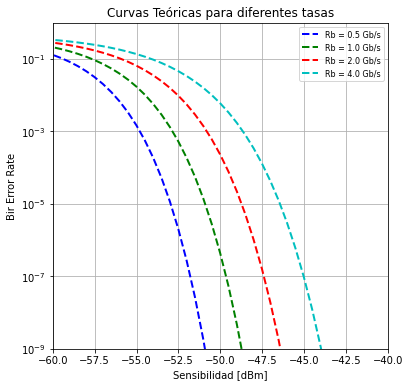

In [12]:
R = 1
nf = idb(3)
fo = c/1550e-9
g = idb(40)
Rb = 1e9
Dv = 25e9
Df = 0.5*Rb
T = 300

p1 = idbm(np.arange(-60,-25,0.5))


figure(figsize=(6,6))

colors = ['b','g','r','c','m','y','k']
Rb = np.array([0.5,1,2,4])*1e9

for rb,clr in zip(Rb, colors):
    Df = 0.75*rb

    BER_ook = np.vectorize(BER_TEO)(R,nf,g,fo,p1,Dv,Df,T)
    semilogy(dbm(p1/2), BER_ook,f'--{clr}',lw=2,label='Rb = %.1f Gb/s' % (rb/1e9))

title('Curvas Teóricas para diferentes tasas')
xlabel('Sensibilidad [dBm]')
ylabel('Bir Error Rate')
ylim(1e-9,1)
xlim(-60,-40)
grid(which='both')
legend(fontsize = 8)
show()

### BER vs. $\Delta f_{elec}$ para OOK. A tasas de transmisión de 1, 1.5, 2 Gbps y Potencia recibida -52.5 dBm

In [ ]:
Resp = 1
Rb = 1e9
Dv = 25e9

P_laser = 1.5 # dBm (para btener una potencia recibida de -52.5 dBm)

Df = np.logspace(np.log10(0.1*Rb), np.log10(3*Rb), 20)

def OOK_link(Df):
    p = Parametros(P_laser = P_laser,
                    bit_rate = Rb, 
                    nbits = 10**5, 
                    spb = 64,  # debe ser tal que la frecuencia de muestreo sea mayor al doble del ancho de banda del filtro óptico.
                    BW_opt = Dv, 
                    BW_elec = Df,  # el ancho de banda del detector se fija a 3/4 del Slot_rate
                    G_rx = 40, 
                    NF_rx = 5, 
                    G_tx = 30, 
                    landa = 1550e-9, 
                    Responsivity = Resp, 
                    orden_elec = 4, 
                    orden_opt = 4,
                    CHANNEL_LOSS = 81)

    Tx = Transmisor(p)
    Ch = Canal(p, Tx.OUT)
    Rx = Receptor(p, Ch.OUT, Tx.ook_s)

    return Rx.BER_teo, Rx.BER_est, Rx.BER_count

BER_teo, BER_est, BER_count = np.vectorize(OOK_link)(Df)


semilogy(Df, BER_teo, '--', label = 'teo')
semilogy(Df, BER_est, 'v-', label = 'est')
semilogy(Df, BER_count, '*-', label = 'count')

xlabel(r'Ancho de banda del receptor $\Delta f$ [Hz]') 
ylabel('Bit Error Rate')

legend()
grid()
show()

np.savetxt('BER vs. Df (%.1f Gbps OOK P_rx=-52.5dbm BW_opt = 25GHz).txt' % (Rb/1e9), 
            np.array([Df, BER_teo, BER_est, BER_count]).T,
            fmt='%e', delimiter='\t', 
            header='BW_elec\tBER_teo\tBER_est\tBER_count')

### Para mostrar las curvas simuladas

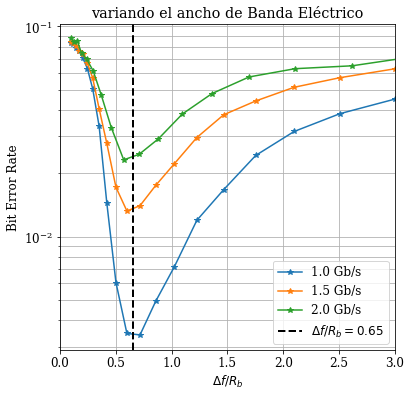

In [76]:
rc('font', **{'family' : 'serif', 'size' : 12})
figure(figsize=(6,6))
title('variando el ancho de Banda Eléctrico')

Df1, ber1_teo, ber1_est, ber1_count = np.loadtxt('BER vs. Df (1.0 Gbps OOK P_rx=-52.5dbm BW_opt = 25GHz).txt', unpack=True)
Df1_5, ber1_5_teo, ber1_5_est, ber1_5_count = np.loadtxt('BER vs. Df (1.5 Gbps OOK P_rx=-52.5dbm BW_opt = 25GHz).txt', unpack=True)
Df2, ber2_teo, ber2_est, ber2_count = np.loadtxt('BER vs. Df (2.0 Gbps OOK P_rx=-52.5dbm BW_opt = 25GHz).txt', unpack=True)

semilogy(Df1/1e9, ber1_est, 'C0*-', label='1.0 Gb/s')

semilogy(Df1_5/(1.5e9), ber1_5_est, 'C1*-', label='1.5 Gb/s')

semilogy(Df2/(2e9), ber2_est, 'C2*-', label='2.0 Gb/s')


axvline(0.65,c='k',ls='--',lw=2, label=r'$\Delta f/R_{b} = 0.65$')
xlabel(r'$\Delta f/R_{b}$')
ylabel('Bit Error Rate')
grid(which='both')
legend(loc='lower right')
xlim(0,3)
# savefig('BER vs. Df (OOK).png', dpi=300)
show()

### BER vs. Bit_rate para OOK. Potencia recibida -52.5 dBm

In [ ]:
Resp = 1
Dv = 25e9

P_laser = 1.5 # dBm (para btener una potencia recibida de -52.5 dBm)
# P_laser = 3.5 # dBm (para btener una potencia recibida de -50.5 dBm)
# P_laser = 5.5 # dBm (para btener una potencia recibida de -48.5 dBm)

Rb = np.logspace(np.log10(0.2e9), np.log10(5e9), 15)

def OOK_link(Rb):
    p = Parametros(P_laser = P_laser,
                    bit_rate = Rb, 
                    nbits = 10**5, 
                    spb = 128,  # debe ser tal que la frecuencia de muestreo sea mayor al doble del ancho de banda del filtro óptico.
                    BW_opt = Dv, 
                    BW_elec = 0.65*Rb,  # el ancho de banda del detector se fija a 0.65 del bit_rate
                    G_rx = 40, 
                    NF_rx = 5, 
                    G_tx = 30, 
                    landa = 1550e-9, 
                    Responsivity = Resp, 
                    orden_elec = 4, 
                    orden_opt = 4,
                    CHANNEL_LOSS = 81)

    Tx = Transmisor(p)
    Ch = Canal(p, Tx.OUT)
    Rx = Receptor(p, Ch.OUT, Tx.ook_s)
    print(power(Rx.IN,'dbm'))

    return Rx.BER_teo, Rx.BER_est, Rx.BER_count

BER_teo, BER_est, BER_count = np.vectorize(OOK_link)(Rb)


semilogy(Rb, BER_teo, '--', label = 'teo')
semilogy(Rb, BER_est, 'v-', label = 'est')
semilogy(Rb, BER_count, '*-', label = 'count')

xlabel('Tasa de transmisión de bits $R_b$ [Gb/s]') 
ylabel('Bit Error Rate')

legend()
grid()
show()

np.savetxt('BER vs. Rb (OOK P_rx=%.1fdbm BW_opt = 25GHz).txt' % (P_laser-3+30-81), 
            np.array([Rb, BER_teo, BER_est, BER_count]).T,
            fmt='%e', delimiter='\t', 
            header='BW_elec\tBER_teo\tBER_est\tBER_count')

### Para mostrar las curvas simuladas

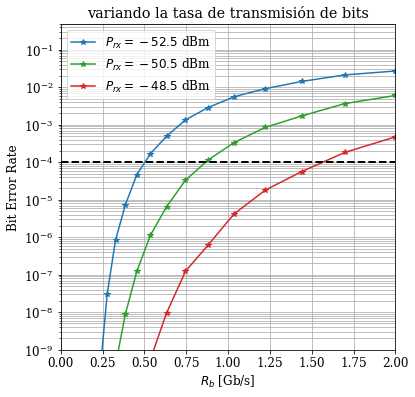

In [87]:
rc('font', **{'family' : 'serif', 'size' : 12})
figure(figsize=(6,6))
title('variando la tasa de transmisión de bits')

Rb1,_, ber1_est,_ = np.loadtxt('BER vs. Rb (OOK P_rx=-52.5dbm BW_opt = 25GHz).txt', unpack=True)
# Rb2,_, ber2_est,_ = np.loadtxt('BER vs. Rb (OOK P_rx=-51.5dbm BW_opt = 25GHz).txt', unpack=True)
Rb3,_, ber3_est,_ = np.loadtxt('BER vs. Rb (OOK P_rx=-50.5dbm BW_opt = 25GHz).txt', unpack=True)
Rb4,_, ber4_est,_ = np.loadtxt('BER vs. Rb (OOK P_rx=-48.5dbm BW_opt = 25GHz).txt', unpack=True)

semilogy(Rb1/1e9, ber1_est, 'C0*-', label = r'$P_{rx}=-52.5$ dBm')
# semilogy(Rb2/1e9, ber2_est, 'C1*-', label = '-51.5 dBm')
semilogy(Rb3/1e9, ber3_est, 'C2*-', label = r'$P_{rx}=-50.5$ dBm')
semilogy(Rb4/1e9, ber4_est, 'C3*-', label = r'$P_{rx}=-48.5$ dBm')

xlabel(r'$R_{b}$ [Gb/s]')
ylabel('Bit Error Rate')
grid(which='both')
legend()
xlim(0,2)
ylim(1e-9,0.5)
axhline(1e-4,c='k',ls='--',lw=2)
show()

### BER vs. $\bar{P}_{rx}$ para OOK. Tasa de transmisión de 1 Gb/s

Execution time: 45.00
Execution time: 53.32
Execution time: 42.15
Execution time: 66.19
Execution time: 57.70
Execution time: 54.61
Execution time: 52.60
Execution time: 62.37
Execution time: 49.32
Execution time: 51.64
Execution time: 52.64
Execution time: 50.81
Execution time: 59.89
Execution time: 52.98
Execution time: 56.84
Execution time: 55.64
Execution time: 50.36
Execution time: 49.24
Execution time: 50.30
Execution time: 45.76
Execution time: 51.21
Execution time: 50.16
Execution time: 48.68
Execution time: 43.51
Execution time: 48.41
Execution time: 50.94
Execution time: 49.57


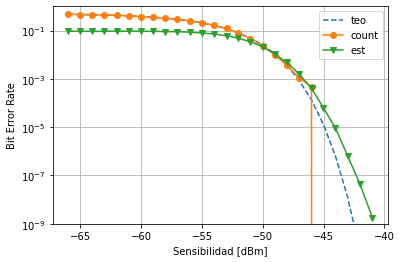

In [8]:
alpha = 0.65  # factor por el cual se debe multiplicar la tasa de slots para obtener el ancho de banda óptimo del receptor
Rb = 4e9

# P_laser = np.arange(-11,9,1) # para 1Gbps
# P_laser = np.arange(-14,12,1) # para 2Gbps
P_laser = np.arange(-12,14,1) # para 4Gbps

def OOK_link(P_laser):
    p = Parametros(P_laser = P_laser,
                    bit_rate = Rb, 
                    nbits = 10**5, 
                    spb = 64,  # debe ser tal que la frecuencia de muestreo sea mayo al doble del ancho de banda del filtro óptico.
                    BW_opt = 25e9, 
                    BW_elec = alpha*Rb,  # el ancho de banda del detector se fija a 3/4 del Slot_rate
                    G_rx = 40, 
                    NF_rx = 5, 
                    G_tx = 30, 
                    landa = 1550e-9, 
                    Responsivity = 1.0, 
                    orden_elec = 4, 
                    orden_opt = 4,
                    CHANNEL_LOSS = 81)

    Tx = Transmisor(p)
    Ch = Canal(p, Tx.OUT)
    Rx = Receptor(p, Ch.OUT, Tx.ook_s)

    return power(Rx.IN,'dbm'), Rx.BER_teo, Rx.BER_est, Rx.BER_count

P_med, BER_teo, BER_est, BER_count = np.vectorize(OOK_link)(P_laser)

semilogy(P_med, BER_teo, '--', label = 'teo')
semilogy(P_med, BER_count, 'o-', label = 'count')
semilogy(P_med, BER_est, 'v-', label = 'est')
legend()
grid()
xlabel('Sensibilidad [dBm]') 
ylabel('Bit Error Rate')
ylim(1e-9,1)
show()

np.savetxt(f'BER vs. sensibilidad (%.1f Gbps OOK).txt'%(Rb/1e9), 
            np.array([P_med, BER_teo, BER_est, BER_count]).T,
            fmt='%e', delimiter='\t', 
            header='Potencia media\tBER_teo\tBER_est\tBER_count')

### Para mostrar las curvas simuladas

(-65.0, -40.0)

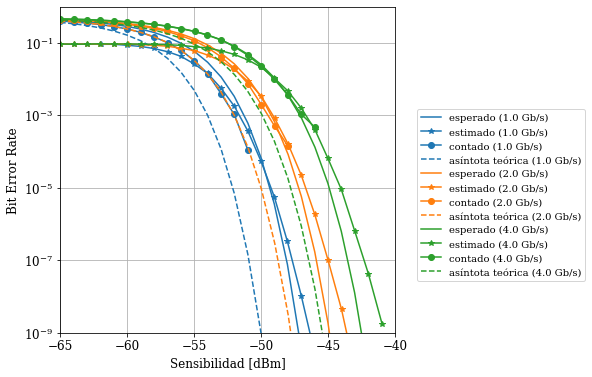

In [11]:
figure(figsize=(6,6))
rc('font', **{'family' : 'serif', 'size' : 12})

p, ber_teo, ber_est, ber_count = np.loadtxt('BER vs. sensibilidad (1.0 Gbps OOK).txt', unpack=True)
semilogy(p, ber_teo, 'C0-', label='esperado (1.0 Gb/s)')
semilogy(p, ber_est, 'C0*-', label='estimado (1.0 Gb/s)')
semilogy(p[ber_count!=0], ber_count[ber_count!=0], '-oC0', label='contado (1.0 Gb/s)')

BER_ook = np.vectorize(BER_TEO)(1.0, idb(3), idb(40), c/1550e-9, idbm(p)*2, 25e9, 0.5*1e9, 300)
semilogy(p, BER_ook, '--C0', label='asíntota teórica (1.0 Gb/s)')

p, ber_teo, ber_est, ber_count = np.loadtxt('BER vs. sensibilidad (2.0 Gbps OOK).txt', unpack=True)
semilogy(p, ber_teo, 'C1-', label='esperado (2.0 Gb/s)')
semilogy(p, ber_est, 'C1*-', label='estimado (2.0 Gb/s)')
semilogy(p[ber_count!=0], ber_count[ber_count!=0], '-oC1', label='contado (2.0 Gb/s)')

BER_ook = np.vectorize(BER_TEO)(1.0, idb(3), idb(40), c/1550e-9, idbm(p)*2, 25e9, 0.5*2e9, 300)
semilogy(p, BER_ook, '--C1', label='asíntota teórica (2.0 Gb/s)')

p, ber_teo, ber_est, ber_count = np.loadtxt('BER vs. sensibilidad (4.0 Gbps OOK).txt', unpack=True)
semilogy(p, ber_teo, 'C2-', label='esperado (4.0 Gb/s)')
semilogy(p, ber_est, 'C2*-', label='estimado (4.0 Gb/s)')
semilogy(p[ber_count!=0], ber_count[ber_count!=0], '-oC2', label='contado (4.0 Gb/s)')

BER_ook = np.vectorize(BER_TEO)(1.0, idb(3), idb(40), c/1550e-9, idbm(p)*2, 25e9, 0.5*4e9, 300)
semilogy(p, BER_ook, '--C2', label='asíntota teórica (4.0 Gb/s)')

xlabel('Sensibilidad [dBm]')
ylabel('Bit Error Rate')
legend(fontsize = 10, bbox_to_anchor = (1.05, 0.7))
grid(which='both')
ylim(1e-9,1)
xlim(-65,-40)
# savefig('Cp3-sensibilidad_ook.png', bbox_inches='tight', dpi=300)

Execution time: 12.26
Execution time: 6.38
Execution time: 6.52
Execution time: 4.91
Execution time: 4.68
Execution time: 4.62
Execution time: 5.73
Execution time: 7.47
Execution time: 8.77
Execution time: 10.47
Execution time: 6.56
Execution time: 4.73
Execution time: 4.54
Execution time: 4.66
Execution time: 5.14
Execution time: 5.63
Execution time: 6.03
Execution time: 4.85
Execution time: 4.19


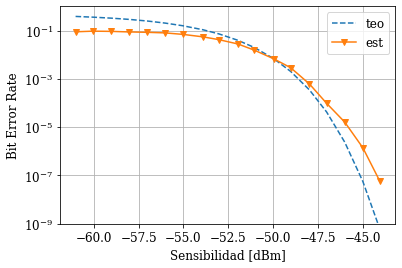

In [16]:
alpha = 0.65  # factor por el cual se debe multiplicar la tasa de slots para obtener el ancho de banda óptimo del receptor
Rb = 2.5e9

P_laser = np.arange(-7,11,1)

def OOK_link(P_laser):
    p = Parametros(P_laser = P_laser,
                    bit_rate = Rb, 
                    nbits = 10**4, 
                    spb = 64,  # debe ser tal que la frecuencia de muestreo sea mayo al doble del ancho de banda del filtro óptico.
                    BW_opt = 25e9, 
                    BW_elec = alpha*Rb,  # el ancho de banda del detector se fija a 3/4 del Slot_rate
                    G_rx = 40, 
                    NF_rx = 5, 
                    G_tx = 30, 
                    landa = 1550e-9, 
                    Responsivity = 1.0, 
                    orden_elec = 4, 
                    orden_opt = 4,
                    CHANNEL_LOSS = 81)

    Tx = Transmisor(p)
    Ch = Canal(p, Tx.OUT)
    Rx = Receptor(p, Ch.OUT, Tx.ook_s)

    return power(Rx.IN,'dbm'), Rx.BER_teo, Rx.BER_est

P_med, BER_teo, BER_est = np.vectorize(OOK_link)(P_laser)

semilogy(P_med, BER_teo, '--', label = 'teo')
semilogy(P_med, BER_est, 'v-', label = 'est')
legend()
grid()
xlabel('Sensibilidad [dBm]') 
ylabel('Bit Error Rate')
ylim(1e-9,1)
show()

np.savetxt(f'BER vs. sensibilidad (%.1f Gbps OOK).txt'%(Rb/1e9), 
            np.array([P_med, BER_teo, BER_est]).T,
            fmt='%e', delimiter='\t', 
            header='Potencia media\tBER_teo\tBER_est')

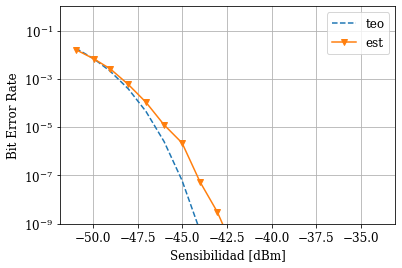

In [15]:
semilogy(P_med, BER_teo, '--', label = 'teo')
semilogy(P_med, BER_est, 'v-', label = 'est')
legend()
grid()
xlabel('Sensibilidad [dBm]') 
ylabel('Bit Error Rate')
ylim(1e-9,1)
show()